# Laboratorio 1

**Andres Chaparro - 202111146** 

**Juan Esteban Lopez Ulloa - 202021417**


#

In [28]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

# 1. Carga de datos (csv)
Se cargan la base de datos (CSV) para trabajar con estos

In [29]:
# Cargar los datos de los archivos CSV
direccionValidation = 'validation_data.csv'
direccionTrain = 'train_data.csv'
validation_data = pd.read_csv(direccionValidation)
train_data = pd.read_csv(direccionTrain)

print(validation_data.shape)
print(train_data.shape)

(1000, 17)
(4000, 18)


In [30]:
validation_data.head()

,ra,colv,i,rowv,class,dec,score,camcol,field,clean,r,z,g,run,objid,u,mjd
0,190.129408,0.000187,17.04507,0.000731,STAR,0.740488,0.822898,5,496,1,17.23757,16.98653,17.72796,756,1237648722308890798,18.84865,54567
1,126.739160,-0.001844,17.87246,-0.000979,STAR,-0.982894,0.868712,1,73,1,17.96179,17.83893,18.27308,756,1237648720133685722,19.34957,53083
2,162.692083,-0.004810,16.20404,-0.004358,GALAXY,1.068587,0.830950,6,313,0,16.55942,15.94029,17.21567,756,1237648722833768573,18.64485,51909
3,190.181702,-0.012342,17.48020,-0.002584,GALAXY,0.797830,0.833386,5,497,0,17.69294,17.30092,18.12268,756,1237648722308956300,19.25978,51941
4,225.414989,-0.000250,17.81908,-0.000397,STAR,0.878768,0.881142,6,547,1,17.89974,17.79936,18.12826,752,1237648705669234734,19.39298,51990


In [31]:
train_data.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465


# 2. Entendimientos de los datos

El análisis realizado muestra que no hay valores nulos en ninguna de las columnas del DataFrame validation_data. Esto es evidente ya que la proporción de valores nulos para todas las columnas (ra, colv, i, rowv, class, dec, score, camcol, field, clean, r, z, g, run, objid, u, mjd) es igual a 0.

In [32]:
features = ["objid", "ra", "dec", "u", "g", "r", "i", "z", "run", "camcol", "field", "score", "clean", "class", "redshift", "mjd", "rowv", "colv"]
train_data[features].isnull().sum() / train_data.shape[0]


objid       0.0
ra          0.0
dec         0.0
u           0.0
g           0.0
r           0.0
i           0.0
z           0.0
run         0.0
camcol      0.0
field       0.0
score       0.0
clean       0.0
class       0.0
redshift    0.0
mjd         0.0
rowv        0.0
colv        0.0
dtype: float64

### 2.1. Búsqueda de relaciones con la variable objetivo

#### Relaciones entre las Magnitudes con la variable objetivo Redshift
Se puede observar que las magnitudes se distribuyen de forma aleatoria respecto al redshift y todas tienen una distribución algo similar pero esto se puede deber a datos atipicos que pueden estar afectando como se pueden notar hay datos que estan muy por encima de los demas, lo que puede indicar presencia de outliers

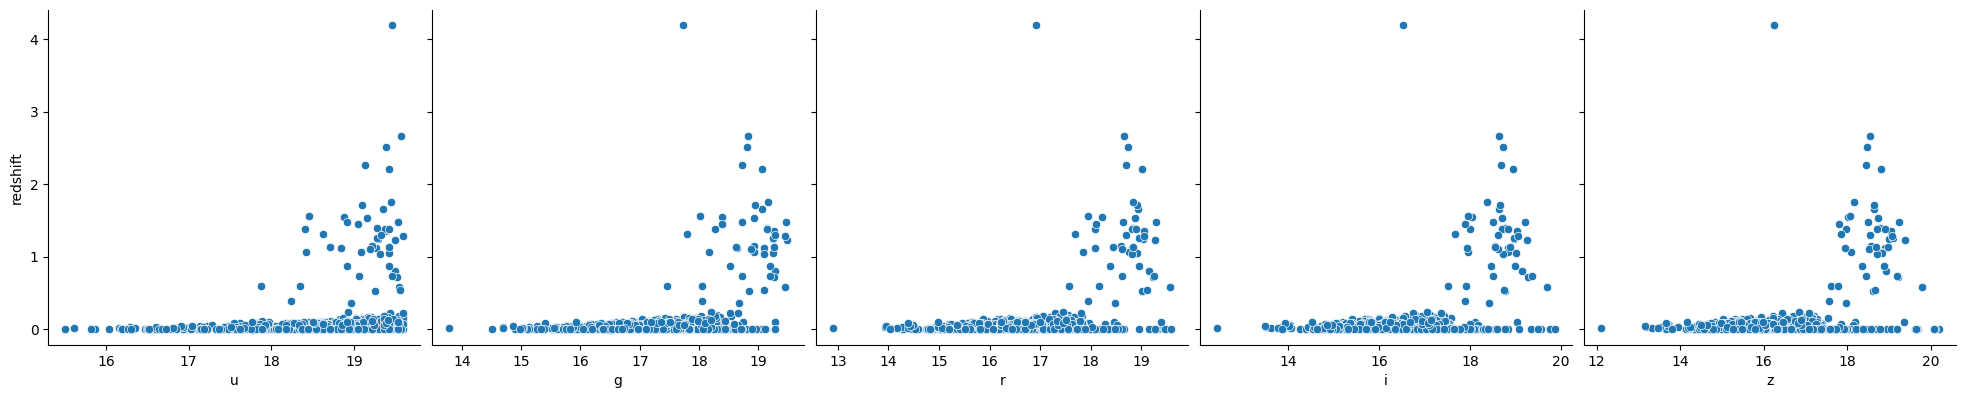

In [33]:

magnitude_features = ["u", "g", "r", "i", "z"]
sns.pairplot(train_data.sample(frac=0.2), height=4, y_vars="redshift", x_vars=magnitude_features, kind="scatter")


#### Relaciones de otros atributos como la ubicación, velocidad y valor de calidad con el valor objetivo Redshift

En este caso se puede observar como la ubicación en ascenso y declinacion tiene una distribucion aleatoria pero con algunos valores atipicos que salen del rango comun de los datos, lo que se puede observar mas en la ubicacion de declinación.  Por otro lado en las velocidades se puede observar también una distribucion similar en ambas donde se centran los datos en cero. Por ultimo, en el valor de calidad de la observación se puede observar tambien una distribución aleatoria donde normalmente se tiene una gran calidad de las fotos, pero hay otra pequeña cantidad de datos que obtuvieron baja calidad de datos.

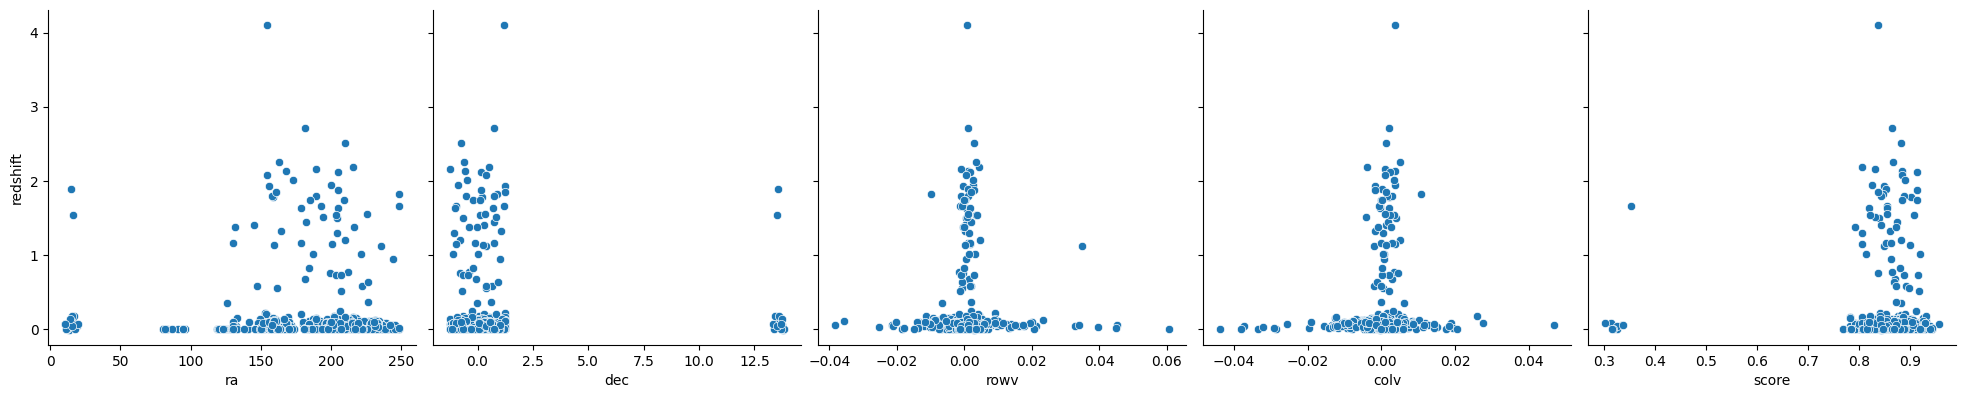

In [34]:
features = ["ra", "dec", "rowv", "colv", "score"]
sns.pairplot(train_data.sample(frac=0.2), height=4, y_vars="redshift", x_vars=features, kind="scatter")



#### Relaciones de otros atributos como el numero de observación, sección y dia juliano con el valor objetivo Redshift

Se puede observar como el numero de observación realizada por el telescopio tiene valores muy cercanos a un valores exceptuando por algunos valores que toman valores extremos, para el caso de la seccion de la columna field y camcol se puede observar una distribucion aleatoria 

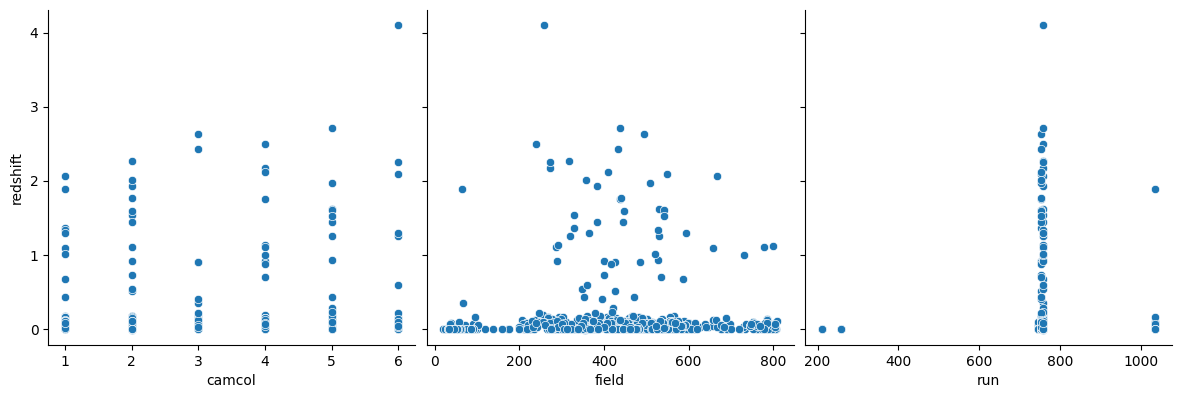

In [35]:
features = ["camcol", "field", "run"]
sns.pairplot(train_data.sample(frac=0.2), height=4, y_vars="redshift", x_vars=features, kind="scatter")


#### Relaciones de otros atributos categoricos con el valor objetivo Redshift

En los BoxPlots de abajo se observan las diferentes columnas categoricas que hay en la base de datos, para el caso de la clase del tipo registrado se deberian tener solamente Estrella (STAR) o Galaxia (GALAXY) o Cuasar (QSO) pero se puede observar que hay otras clases no identificadas como S, QUASAR y Q lo que puede indicar errores en estos datos. Para los otros datos categoricos si se ven relaciones aleatorias sin alteraciones o probables errores.


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7628\1093796258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_data, x="class", y="redshift", palette="Set2")


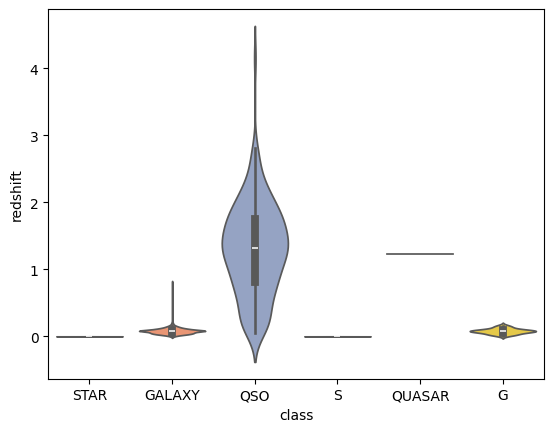

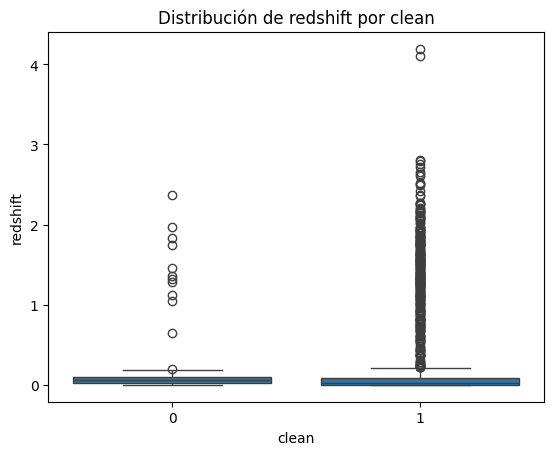

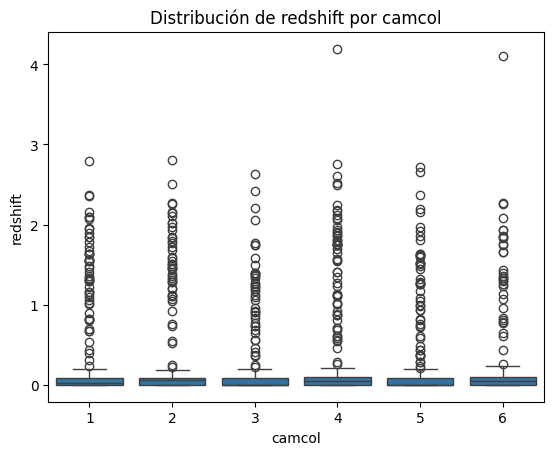

In [36]:
# Distribución de redshift por clase de objeto (class)
sns.violinplot(data=train_data, x="class", y="redshift", palette="Set2")
plt.show()

# Boxplot para cada característica categórica individualmente
for feature in ["clean", "camcol"]:
    
    sns.boxplot(data=train_data, x=feature, y="redshift")
    plt.title(f"Distribución de redshift por {feature}")
    plt.show()


### 2.2. Búsqueda de relaciones entre las variables de entrada


En la grafica de abajo se grafica las correlaciones entre las diferentes variables numericas, como se puede observar hay poca correlacion entre las diferentes variables exceptuando en las magnitudes donde estas tienen correlaciones altas que pueden variar desde 0,5 a 0,8 de correlacion entre estas

<Axes: >

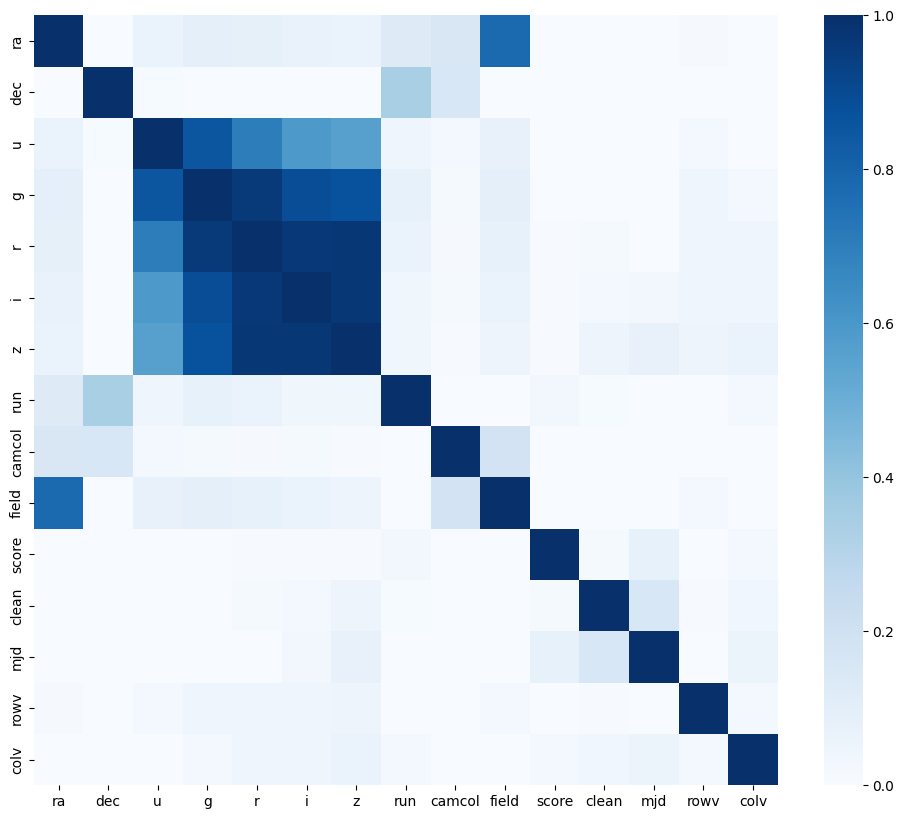

In [37]:
features = [ "ra", "dec", "u", "g", "r", "i", "z", "run", "camcol", "field", "score", "clean", "mjd", "rowv", "colv"]
plt.figure(figsize=(12, 10))
sns.heatmap(train_data[features].corr(), cmap="Blues", vmin=0, vmax=1)

### 2.3 Distribuciones individuales de las características

Aca se puede observar que la mayoria de magnitudes tienden a formar un histograma con distribucion normal exceptuando al magnitud de ultravioleta, en cuanto a las ubicaciones muestran una distribucion mas aleatoria, en cuanto al score de calidad tambien presenta una distribucion normal pero con valores extremos, por ultimo, las velocidades y redshift presentan una distribucion con menor variacion en sus datos centrandose en unos valores especificos.

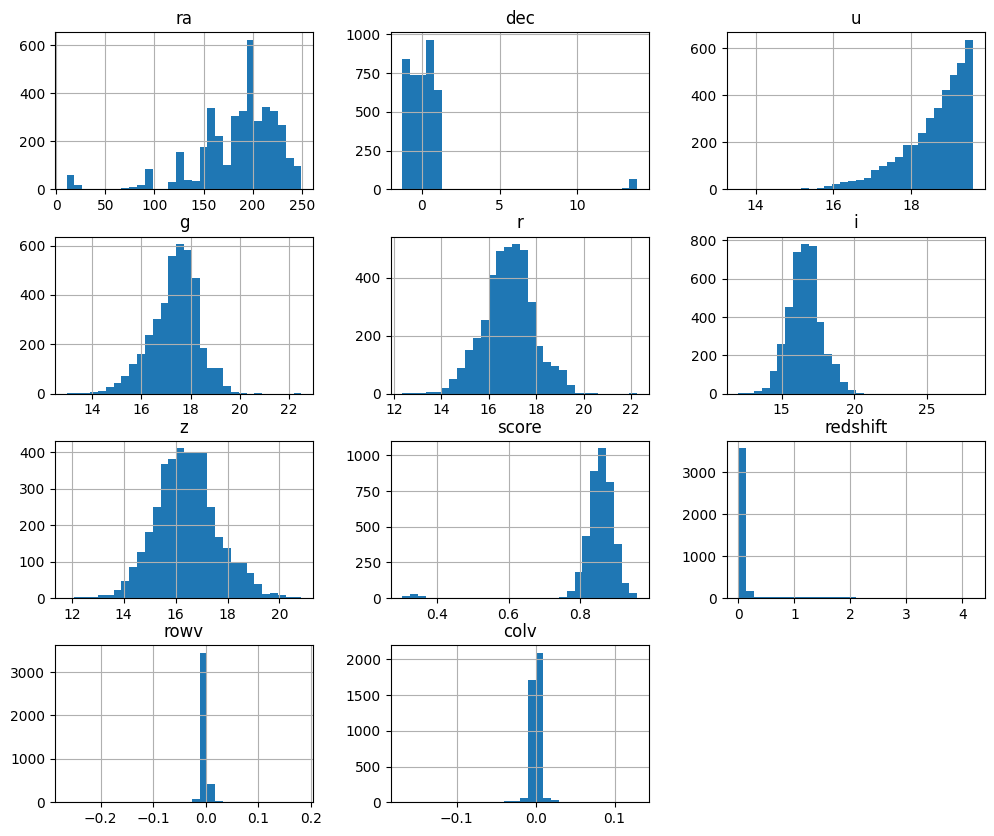

In [38]:

features = ["ra", "dec", "u", "g", "r", "i", "z", "score", "redshift", "rowv", "colv"]
train_data[features].hist(figsize=(12, 10), bins=30)
plt.show()


## 3. Selección de variables

<Axes: >

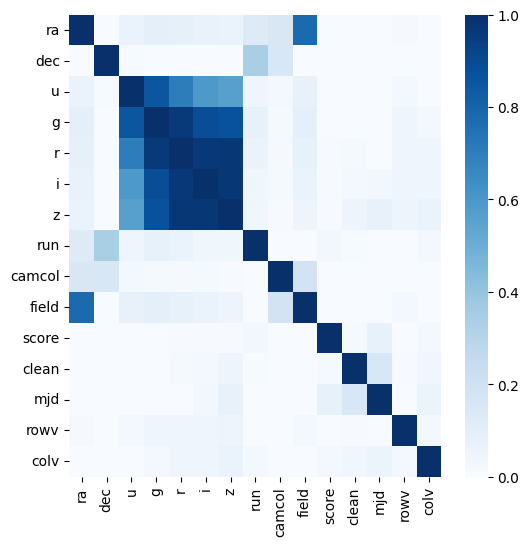

In [39]:
features = [ "ra", "dec", "u", "g", "r", "i", "z", "run", "camcol", "field", "score", "clean", "mjd", "rowv", "colv"]
plt.figure(figsize=(6, 6))
sns.heatmap(train_data[features].corr(), cmap="Blues", vmin=0, vmax=1)

Teniendo en cuenta el mapa de correlación se empezarán a eliminar variables que tengan la correlación superior a 0.8 como se menciona en el laboratorio de "Machine learning supervisado, regresión". Inicialmente se eliminará la la variable "z" que corresponde a casi-infrarojo, se espera que con la variable "i" la cual corresponde a infrarojo baste para utilizar bien el modelo.

In [40]:
#Eliminar la columba z
train_data_filtrada_1 = train_data.drop(columns=['z'])
train_data_filtrada_1.head()

validation_data_filtrada_1 = validation_data.drop(columns=['z'])
validation_data_filtrada_1.head()

,ra,colv,i,rowv,class,dec,score,camcol,field,clean,r,g,run,objid,u,mjd
0,190.129408,0.000187,17.04507,0.000731,STAR,0.740488,0.822898,5,496,1,17.23757,17.72796,756,1237648722308890798,18.84865,54567
1,126.739160,-0.001844,17.87246,-0.000979,STAR,-0.982894,0.868712,1,73,1,17.96179,18.27308,756,1237648720133685722,19.34957,53083
2,162.692083,-0.004810,16.20404,-0.004358,GALAXY,1.068587,0.830950,6,313,0,16.55942,17.21567,756,1237648722833768573,18.64485,51909
3,190.181702,-0.012342,17.48020,-0.002584,GALAXY,0.797830,0.833386,5,497,0,17.69294,18.12268,756,1237648722308956300,19.25978,51941
4,225.414989,-0.000250,17.81908,-0.000397,STAR,0.878768,0.881142,6,547,1,17.89974,18.12826,752,1237648705669234734,19.39298,51990


<Axes: >

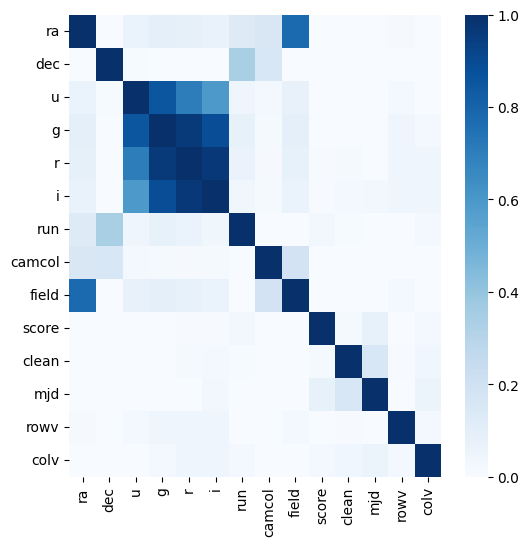

In [41]:
features = [ "ra", "dec", "u", "g", "r", "i", "run", "camcol", "field", "score", "clean", "mjd", "rowv", "colv"]
plt.figure(figsize=(6, 6))
sns.heatmap(train_data_filtrada_1[features].corr(), cmap="Blues", vmin=0, vmax=1)

Ahora bien, ya eliminando la variable "z" se vuelve a realizar el analisis de las correlaciones en el cual se puede ver que siguen existiendo relaciones mayores a 0.8. En este orden de ideas, se eliminará la variable del filtro verde (g) para seguir evitando información redundante en las variables.

In [42]:
#Eliminar la columba g
train_data_filtrada_2 = train_data_filtrada_1.drop(columns=['g'])
train_data_filtrada_2.head()

validation_data_filtrada_2 = validation_data_filtrada_1.drop(columns=['g'])
validation_data_filtrada_2.head()

,ra,colv,i,rowv,class,dec,score,camcol,field,clean,r,run,objid,u,mjd
0,190.129408,0.000187,17.04507,0.000731,STAR,0.740488,0.822898,5,496,1,17.23757,756,1237648722308890798,18.84865,54567
1,126.739160,-0.001844,17.87246,-0.000979,STAR,-0.982894,0.868712,1,73,1,17.96179,756,1237648720133685722,19.34957,53083
2,162.692083,-0.004810,16.20404,-0.004358,GALAXY,1.068587,0.830950,6,313,0,16.55942,756,1237648722833768573,18.64485,51909
3,190.181702,-0.012342,17.48020,-0.002584,GALAXY,0.797830,0.833386,5,497,0,17.69294,756,1237648722308956300,19.25978,51941
4,225.414989,-0.000250,17.81908,-0.000397,STAR,0.878768,0.881142,6,547,1,17.89974,752,1237648705669234734,19.39298,51990


<Axes: >

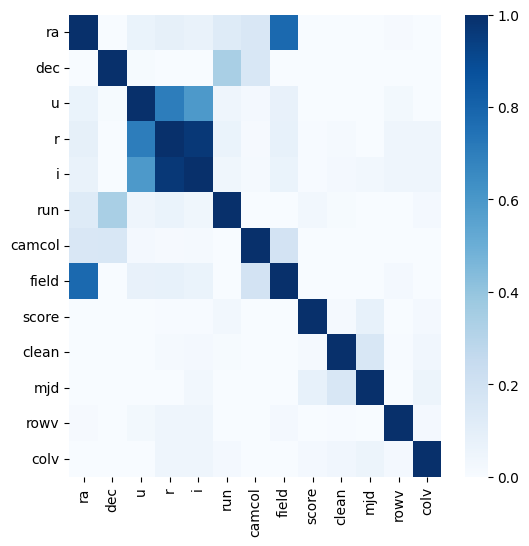

In [43]:
features = [ "ra", "dec", "u", "r", "i", "run", "camcol", "field", "score", "clean", "mjd", "rowv", "colv"]
plt.figure(figsize=(6, 6))
sns.heatmap(train_data_filtrada_2[features].corr(), cmap="Blues", vmin=0, vmax=1)

Finalmente se eliminará la variable "r" la cual corresponde al filtro rojo ya que se cuenta con la variable de filtro infrarojo(i) la cual como se puede ver en el grafico de correlación se podría tener inforamción redundante.

In [44]:
#Eliminar la columba r
train_data_filtrada_3 = train_data_filtrada_2.drop(columns=['r'])
train_data_filtrada_3.head()

validation_data_filtrada_3 = validation_data_filtrada_2.drop(columns=['r'])
validation_data_filtrada_3.head()

,ra,colv,i,rowv,class,dec,score,camcol,field,clean,run,objid,u,mjd
0,190.129408,0.000187,17.04507,0.000731,STAR,0.740488,0.822898,5,496,1,756,1237648722308890798,18.84865,54567
1,126.739160,-0.001844,17.87246,-0.000979,STAR,-0.982894,0.868712,1,73,1,756,1237648720133685722,19.34957,53083
2,162.692083,-0.004810,16.20404,-0.004358,GALAXY,1.068587,0.830950,6,313,0,756,1237648722833768573,18.64485,51909
3,190.181702,-0.012342,17.48020,-0.002584,GALAXY,0.797830,0.833386,5,497,0,756,1237648722308956300,19.25978,51941
4,225.414989,-0.000250,17.81908,-0.000397,STAR,0.878768,0.881142,6,547,1,752,1237648705669234734,19.39298,51990


<Axes: >

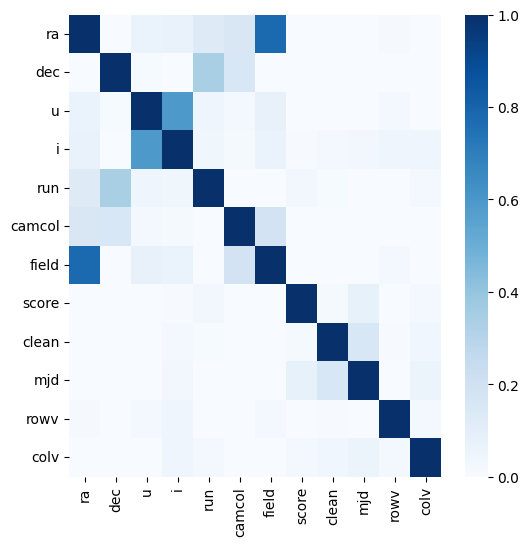

In [45]:
features = [ "ra", "dec", "u", "i", "run", "camcol", "field", "score", "clean", "mjd", "rowv", "colv"]
plt.figure(figsize=(6, 6))
sns.heatmap(train_data_filtrada_2[features].corr(), cmap="Blues", vmin=0, vmax=1)

Adicionalmente se dicidio eliminar las columnas objid y runs ya que es información que creemos no aporta valor. Mientras que al quitar estas columnas disminuimos el tamaño de los datos.

In [46]:
#Eliminar la columba runs y objid
train_data_filtrada_4 = train_data_filtrada_3.drop(columns=['run', 'objid'])
train_data_filtrada_4.head()

validation_data_filtrada_4 = validation_data_filtrada_3.drop(columns=['run', 'objid'])
validation_data_filtrada_4.head()

,ra,colv,i,rowv,class,dec,score,camcol,field,clean,u,mjd
0,190.129408,0.000187,17.04507,0.000731,STAR,0.740488,0.822898,5,496,1,18.84865,54567
1,126.739160,-0.001844,17.87246,-0.000979,STAR,-0.982894,0.868712,1,73,1,19.34957,53083
2,162.692083,-0.004810,16.20404,-0.004358,GALAXY,1.068587,0.830950,6,313,0,18.64485,51909
3,190.181702,-0.012342,17.48020,-0.002584,GALAXY,0.797830,0.833386,5,497,0,19.25978,51941
4,225.414989,-0.000250,17.81908,-0.000397,STAR,0.878768,0.881142,6,547,1,19.39298,51990


## 4. Preparación y limpieza de datos

In [47]:
features = train_data_filtrada_4.columns

train_data_prep = train_data_filtrada_4.copy()

In [48]:
# Reviasr si hay valores nulos
print(train_data_prep.isnull().sum())

ra          0
dec         0
u           0
i           0
camcol      0
field       0
score       0
clean       0
class       0
redshift    0
mjd         0
rowv        0
colv        0
dtype: int64


In [49]:
# Reivsar si hay duplicados
duplicated_rows_xy = train_data_prep.loc[train_data_prep.duplicated(keep=False)].shape[0]
print(duplicated_rows_xy)

duplicated_rows_x = train_data_prep.loc[train_data_prep.duplicated(subset=features, keep=False)].shape[0]
print(duplicated_rows_x)

34
34


Como el numero de duplicados es el mismo incluyendo o no la variable de respuesta (redshift) entonces lo unico que se debe hacer es eliminar estos valores.

In [50]:
train_data_prep_1 = train_data_prep.drop_duplicates(keep='first')
train_data_prep_1.shape

(3983, 13)

In [51]:
# Verificar problemas consistencia y validez
# u, i mayores a 0
print(train_data_prep_1[train_data_prep_1["u"] < 0].shape[0])
# scores valores entre 0 y 1
print(train_data_prep_1[train_data_prep_1["score"] < 0].shape[0])
print(train_data_prep_1[train_data_prep_1["score"] > 1].shape[0])
# clean es o 0 o 1
dif_0 = train_data_prep_1[train_data_prep_1["clean"] != 0].shape[0]
dif_1 = train_data_prep_1[train_data_prep_1["clean"] != 1].shape[0]
print(dif_0 + dif_1 - train_data_prep_1.shape[0])

0
0
0
0


Dada la información en el diccionario de datos se verificó que los datos fueran coherentes. Efectivamente no hay datos que no sean coherentes con la definicion dada. También se verifico la validez de los datos al asegurar que se cumplieran los rangos de los valores.

Antes de volver la caracteristica "class" en una variable dummy, primero se debe corregir el problema de inconsistencia ya que en el diccionario mencionan solo 3 tipos de clase y en los datos hay 2 extra que son S y G. En este caso asumiremos que los datos con el valor S pertenecen a la categoria STAR y el valor G a la categoria GALAXY

In [ ]:
# Los registros con S se replaza por STAR, los que tienen G con GALAXY y los que tienen QUASAR con QSO
train_data_prep_2 = train_data_prep_1.copy()
train_data_prep_2["class"] = train_data_prep_1["class"].replace({"S": "STAR", "G": "GALAXY", "QUASAR": "QSO"})
print(train_data_prep_2["class"].value_counts())

class
GALAXY    1891
STAR      1800
QSO        292
Name: count, dtype: int64


In [57]:
# Arreglar el mismo error para los datos de validations
validation_data_prep = validation_data_filtrada_4.copy()
validation_data_prep["class"] = validation_data_filtrada_4["class"].replace({"S": "STAR", "G": "GALAXY", "QUASAR": "QSO"})
print(validation_data_prep["class"].value_counts())

class
STAR      466
GALAXY    442
QSO        92
Name: count, dtype: int64


In [ ]:
# Importtat profiling para perfilar los datos
from ydata_profiling import ProfileReport

profile = ProfileReport(train_data_prep_1, title="Pandas Profiling Report")
# mostrar el reporte en el notebook
profile.to_widgets()

Con el perfilamiento de los datos se pudo ver que las caracteristicas "class" y "clean" son varibales categoricas. Como el model que se utilizará es regresion lineal, se necestia que todos los valores sean numericos. En el caso de "clean", si bien es categorica, es una variable dummie, por lo que ya se encuentra en numeros (0 y 1) pero los valores de la variable "class" si son categorias por lo que se debe transformar esta variable.

In [56]:
# Separar las categorias de la columna class en diferentes columnas y si pertenece a la categoria se pone un 1 y si no un 0
train_data_prep_3 = pd.get_dummies(train_data_prep_2, columns=["class"], drop_first=True, dtype=int)
train_data_prep_3.head()

,ra,dec,u,i,camcol,field,score,clean,redshift,mjd,rowv,colv,class_QSO,class_STAR
0,185.574486,0.701402,19.11034,16.82993,5,466,0.864145,1,8.780529e-05,54140,0.002418,0.001363,0,1
1,203.801841,-0.853906,18.90957,16.62059,1,588,0.816541,1,8.619995e-02,51955,0.008650,0.007056,0,0
2,160.034264,-0.421626,19.26340,16.42307,2,295,0.870381,1,1.330486e-01,51913,0.003938,-0.002028,0,0
3,200.807373,-0.682024,18.82022,17.11128,2,382,0.867801,1,8.636355e-02,51959,0.001839,0.001160,0,0
4,189.792404,-1.001480,18.91391,19.75660,1,494,0.833824,1,-4.090000e-08,54562,0.001929,-0.000465,0,1


In [ ]:
# Volver la columna class en una columna categorica para los datos validations
validation_data_prep_1 = pd.get_dummies(validation_data_prep, columns=["class"], drop_first=True, dtype=int)
validation_data_prep_1.head()

,ra,colv,i,rowv,dec,score,camcol,field,clean,u,mjd,class_QSO,class_STAR
0,190.129408,0.000187,17.04507,0.000731,0.740488,0.822898,5,496,1,18.84865,54567,0,1
1,126.739160,-0.001844,17.87246,-0.000979,-0.982894,0.868712,1,73,1,19.34957,53083,0,1
2,162.692083,-0.004810,16.20404,-0.004358,1.068587,0.830950,6,313,0,18.64485,51909,0,0
3,190.181702,-0.012342,17.48020,-0.002584,0.797830,0.833386,5,497,0,19.25978,51941,0,0
4,225.414989,-0.000250,17.81908,-0.000397,0.878768,0.881142,6,547,1,19.39298,51990,0,1
